# Mass-Casualty Triage Exercise
## Compbio Camp - February 2019
### Author: Eric Friedlander


# <span style='color:blue'>*YOUR NAME HERE*</span>

We are going to be examining how different patient admission policies over the course of a 12 hour (720 minute) mass-casualty event change patient survival! By finding the best policy in different scenarios we can more effectively provide treatment and save lives. First, we need to import several packages which will be helpful.

In [2]:
# Import all necessary packages
import numpy as np
import matplotlib.pyplot as plt
from triage_funcs import *

## Patient Arrivals

Patients arrive at the hospital at different times. It takes some time to get from the scene of the emergency to the hospital, so no one arrives right away. Because everyone’s in a hurry to see a doctor, no one takes many hours either. This curve shows the average number of patients that arrive at the hospital over time. There are two parameters: `num_pat` controls the number of patients expected on average and `peak` controls when we should expect the most arrivals. Try playing with the values inside the box of #'s and see how it changes the intensity curve (make sure to pay attention to the $y$-axis).

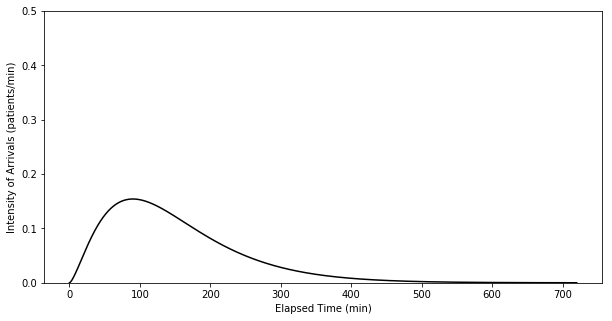

In [3]:
# Parameters for the curve
##############
num_pat = 30 #
peak = 150   #
##############

plt.rcParams['figure.figsize'] = [10, 5]
plot_arr_int(num_pat, peak)

What would happen if the IMMEDIATE (orange) and DELAYED (blue) patients arrived in different ways? The cell below will generate plots of the average arrivals for both classes of patients. You can change the way the curves look by altering the following variables inside the box of #s:
1. `numPatients` - controls the **TOTAL** number of patients
2. `ratio` - the ratio of IMMEDIATE to DELAYED patients
3. `peakI` - the time of the peak arrival intensity for IMMEDIATE class patients
4. `peakD` - the time of the peak arrival intensity for DELAYED class patients

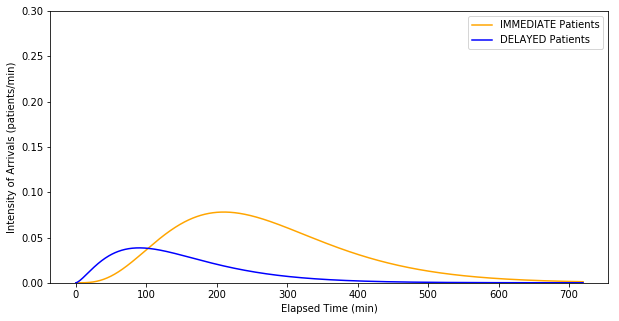

In [4]:
# Parameters for arrival processes
###############################################################################################
numPatients = 30 # Total number of patients on average                                        #
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients                                 #
peakI = 270 # This parameter controls when the peak of arrivals is for IMMEDIATE patients     #
peakD = 150 # This parameter controls when the peak of arrivals is for DELAYED patients       #
###############################################################################################

plot_arr_ints(numPatients, ratio, peakI, peakD)

We can now use the computer to generate a sequence of arrivals. Run the cell below to see an example. Each simulated arrival is denoted by an x. Notice that you get different pictures every time you run it. Why is this? Where do the x's tend to fall?

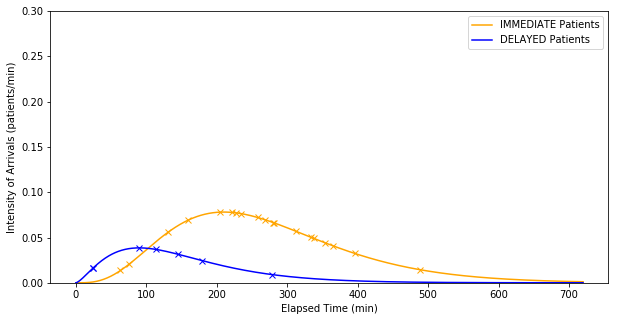

In [5]:
plot_arrivals(numPatients, ratio, peakI, peakD)

## Patient Survival
What happens when we redirect a patient to another hospital? There is some probability that the patient may die before reaching the next hospital. To mimic this, we can use the computer to generate ***random numbers*** for us. If we give the computer a probability, it can flip a coin for us and tell us whether its heads (!) or tails (0). In our simulation, we can say that patients survive when a heads comes up. Why might we want the computer to do this? Why not just come up with the numbers ourselves? 

See if you can beat the mindreader: http://www.mindreaderpro.appspot.com/

The cell below generates a sequence of random zeros and ones. Let's say that a one means a patient survives the trip to the next hospital and zeros means that they don't make it. The parameter `prob` represents the probability of survival. What happens when you increase `prob`? What do you think appropriate values of `prob` might be for our IMMEDIATE and DELAYED class patients.

In [6]:
prob = .6 # parameter controlling the probability of survival
np.random.binomial(1, prob, size = 20)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

## Putting It All Together
Now we will take all of these inputs and run an actual simulation of a mass casualty event. Let's first walk through how a simulation might work with the following parameters:
1. `ratio = 1/3`
2. `peakI = 4.5`
3. `peakD = 2.5`
4. `probI = .4`
5. `probD = .8`

Run the cell below and following the direction!

In [7]:
sim_walkthrough()    

Grab a BLUE index card from the front and write 8.1 on the front and 1 on the back.


Using the computer we can run this simulation MANY times. The parameter `num_reps` controls the number of times the simulation is run. We can also try out many different parameters.
Try out some different parameters inside the box of #s and running the simulation below. Why might we want to run many simulations.

In [8]:
###############################################################################################
# How many simulations to run                                                                 #
num_reps = 1000                                                                               #
                                                                                              #
# Parameters for arrival processes                                                            #
numPatients = 20 # Total number of patients on average                                        #
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients                                 #
peakI = 270 # This parameter controls when the peak of arrivals is for IMMEDIATE patients     #
peakD = 150 # This parameter controls when the peak of arrivals is for DELAYED patients       #                      #
num_beds = 10 # Number of beds in the hospital                                                 #
                                                                                              #
# Probabilities of surviving the trip to another hospital                                     #
probI = .4                                                                                    #
probD = .5                                                                                    #
###############################################################################################

output = simulate(num_reps, num_beds, numPatients, ratio, peakI, peakD, probI, probD)

FCFS resulted in an average of 5.969 deaths and 14.16 survivers with 0.008 beds remaining.
IMMEDIATE ONLY resulted in an average of 5.635 deaths and 14.494 survivers with 0.154 beds remaining.


It may be helpful to look at the distribution of our simulation results, run the cell below to get some "box-and-whisker" plots of our simulated data.

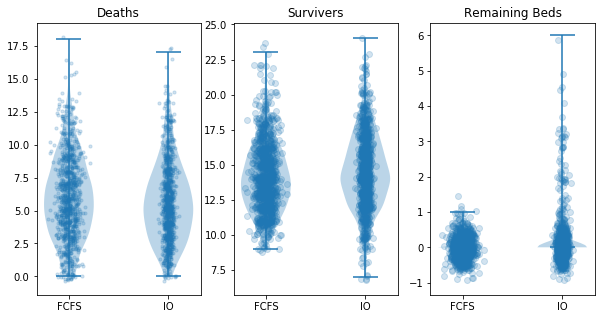

In [9]:
xA, xB = np.random.normal(0, 0.03, num_reps), np.random.normal(0, 0.3, num_reps)

plt.subplot(1,3,1)
plt.violinplot(output[0:2])
plt.scatter([[1]*num_reps + xA, [2]*num_reps] + xA, [output[0]+xB, output[1]+xB], alpha=0.2, s=10)
plt.title('Deaths')
plt.xticks([1, 2], ['FCFS', 'IO'])

plt.subplot(1,3,2)
plt.violinplot(output[2:4])
plt.scatter([[1]*num_reps + xA, [2]*num_reps] + xA, [output[2]+xB, output[3]+xB], alpha=0.2, s=10)
plt.title('Survivers')
plt.xticks([1, 2], ['FCFS', 'IO'])

plt.subplot(1,3,3)
plt.violinplot(output[4:])
plt.scatter([[1]*num_reps + xA, [2]*num_reps] + xA, [output[4]+xB, output[5]+xB], alpha=0.2, s=10)
plt.title('Remaining Beds')
plt.xticks([1, 2], ['FCFS', 'IO'])

plt.show()